In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [122]:
train = pd.read_csv('train.csv', sep=',')
train.head()
y = train['target']
X_train = train.drop(columns=['target', 'feature1', 'feature6', 'feature2'])

In [123]:
def calc_nulls(dt):
    total_nulls = dt.isnull().sum()
    total_observations = dt.shape[0]
    null_percentages = total_nulls[total_nulls > 0] / total_observations * 100
    total_nulls = total_nulls[total_nulls > 0]
    pd.concat([total_nulls, null_percentages], axis=1, keys=["Total", "Percentage"]).sort_values(by="Total", ascending=False)
#to remove feature1, feature6

In [124]:
from sklearn.impute import SimpleImputer
def fill_nulls(X):
    null_cols = ["feature4", "feature3", "feature5"]
    median_imputer = SimpleImputer(strategy="median")
    for col in null_cols:
        X[col] = median_imputer.fit_transform(X[col].values.reshape(-1,1))
fill_nulls(X_train)

In [125]:
duplicates_index = X_train[X_train.duplicated(keep="first")].index
duplicates_index
X_train.shape

(1000, 10)

/tmp/ipykernel_61508/4185951040.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  X_train.hist(bins=50, ax=ax)


array([[<Axes: title={'center': 'feature3'}>,
        <Axes: title={'center': 'feature4'}>,
        <Axes: title={'center': 'feature5'}>],
       [<Axes: title={'center': 'feature7'}>,
        <Axes: title={'center': 'feature8'}>,
        <Axes: title={'center': 'feature9'}>],
       [<Axes: title={'center': 'feature10'}>,
        <Axes: title={'center': 'feature11'}>,
        <Axes: title={'center': 'feature12'}>],
       [<Axes: title={'center': 'feature13'}>, <Axes: >, <Axes: >]],
      dtype=object)

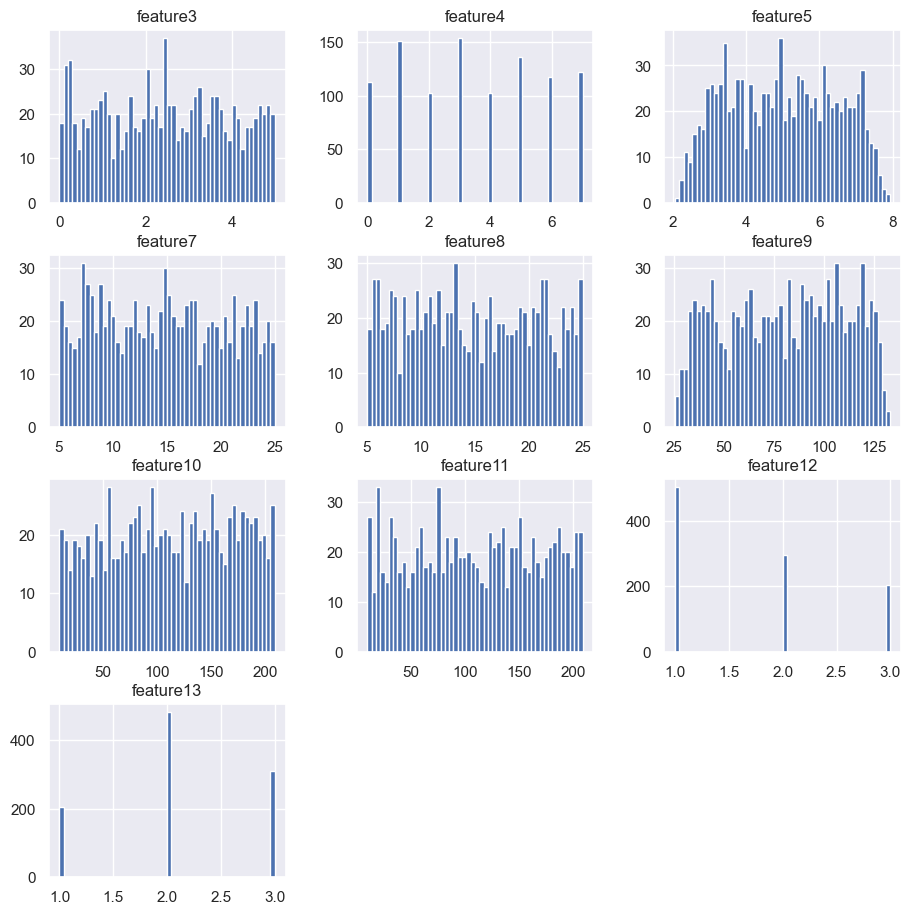

In [126]:
fig, ax = plt.subplots(figsize=(11, 11))
X_train.hist(bins=50, ax=ax)

In [127]:
skew = X_train.skew()
pd.DataFrame(data=skew, columns=["Skew"])

,Skew
feature3,0.010863
feature4,0.033595
feature5,0.011628
feature7,0.055341
feature8,0.039904
feature9,-0.082694
feature10,-0.058819
feature11,-0.012484
feature12,0.576333
feature13,-0.154548


<Axes: >

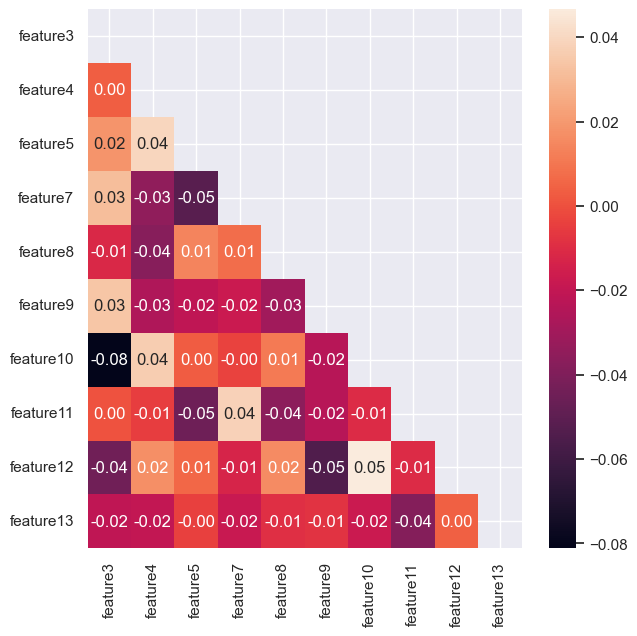

In [128]:
# Visualize the matrix on a heatmap
mask = np.triu(X_train.corr())
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(data=X_train.corr(), annot=True, fmt=".2f", ax=ax, mask=mask)

In [129]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

def eval_classifier(clf, X):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=43)
    n_scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return np.mean(n_scores), np.std(n_scores)

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier

In [150]:
acc_mean, acc_std = eval_classifier(RandomForestClassifier(n_estimators=1000), X_train)
print(f"RandomForestClassifier: mean accuracy = {acc_mean:.5f}, std = {acc_std:.3f}")

RandomForestClassifier: mean accuracy = 0.87667, std = 0.019


In [149]:
acc_mean, acc_std = eval_classifier(HistGradientBoostingClassifier(), X_train)

print(f"HistGradientBoostingClassifier: mean accuracy = {acc_mean:.5f}, std = {acc_std:.3f}")

HistGradientBoostingClassifier: mean accuracy = 0.88800, std = 0.018


In [134]:
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y)
test = pd.read_csv('test.csv', sep=',')
X_test = test.drop(columns=['Id', 'feature1', 'feature6', 'feature2'])
fill_nulls(X_test)
ans = model.predict(X_test)

In [146]:
model = HistGradientBoostingClassifier()
model.fit(X_train, y)
test = pd.read_csv('test.csv', sep=',')
X_test = test.drop(columns=['Id', 'feature1', 'feature6', 'feature2'])
fill_nulls(X_test)
ans = model.predict(X_test)

In [147]:
ans

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [148]:
sample = pd.read_csv('sample.csv', sep=',')
sample['target'] = ans
sample.head(10)
sample.to_csv('HistGradientBoostingClassifier_benchmark.csv', index=False)